# Modeling

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

from sklearn.tree import DecisionTreeClassifier 
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load my clean data
df = pd.read_csv('data/df.csv')
df_cat = pd.read_csv('data/df_cat.csv')
df_num = pd.read_csv('data/df_num.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188956 entries, 0 to 188955
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         188956 non-null  int64  
 1   Zip                188956 non-null  float64
 2   Latitude           188956 non-null  float64
 3   Longitude          188956 non-null  float64
 4   Facility Type      188956 non-null  int64  
 5   Risk               188956 non-null  int64  
 6   Inspection Type    188956 non-null  int64  
 7   Results            188956 non-null  int64  
 8   Violations         188956 non-null  int64  
 9   Inspection Season  188956 non-null  int64  
 10  Inspection Date    188956 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 15.9 MB


In [3]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188956 entries, 0 to 188955
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Unnamed: 0         188956 non-null  int64
 1   Facility Type      188956 non-null  int64
 2   Risk               188956 non-null  int64
 3   Inspection Type    188956 non-null  int64
 4   Results            188956 non-null  int64
 5   Violations         188956 non-null  int64
 6   Inspection Season  188956 non-null  int64
 7   Inspection Date    188956 non-null  int64
dtypes: int64(8)
memory usage: 11.5 MB


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_cat.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_num.drop(['Unnamed: 0'], axis = 1, inplace = True)

df_num.head()

,Zip,Latitude,Longitude
0,60630.0,41.975472,-87.767388
1,60654.0,41.888074,-87.634955
2,60643.0,41.706992,-87.646626
3,60618.0,41.954083,-87.698303
4,60639.0,41.919224,-87.767734


In [5]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188956 entries, 0 to 188955
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Facility Type      188956 non-null  int64
 1   Risk               188956 non-null  int64
 2   Inspection Type    188956 non-null  int64
 3   Results            188956 non-null  int64
 4   Violations         188956 non-null  int64
 5   Inspection Season  188956 non-null  int64
 6   Inspection Date    188956 non-null  int64
dtypes: int64(7)
memory usage: 10.1 MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188956 entries, 0 to 188955
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Zip                188956 non-null  float64
 1   Latitude           188956 non-null  float64
 2   Longitude          188956 non-null  float64
 3   Facility Type      188956 non-null  int64  
 4   Risk               188956 non-null  int64  
 5   Inspection Type    188956 non-null  int64  
 6   Results            188956 non-null  int64  
 7   Violations         188956 non-null  int64  
 8   Inspection Season  188956 non-null  int64  
 9   Inspection Date    188956 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 14.4 MB


In [7]:
df.columns

Index(['Zip', 'Latitude', 'Longitude', 'Facility Type', 'Risk',
       'Inspection Type', 'Results', 'Violations', 'Inspection Season',
       'Inspection Date'],
      dtype='object')

In [8]:
df.head()

,Zip,Latitude,Longitude,Facility Type,Risk,Inspection Type,Results,Violations,Inspection Season,Inspection Date
0,60630.0,41.975472,-87.767388,15,1,49,1,158771,3,10
1,60654.0,41.888074,-87.634955,15,1,71,1,101287,3,6
2,60643.0,41.706992,-87.646626,7,3,16,1,102502,3,17
3,60618.0,41.954083,-87.698303,15,1,13,1,102829,3,3
4,60639.0,41.919224,-87.767734,15,1,16,1,90861,3,7


In [9]:
# Define X and y
X = df.drop(['Results', 'Inspection Date'], axis=1)            
y = df['Results']

print(df.shape)
print(X.shape)
print(y.shape)

(188956, 10)
(188956, 8)
(188956,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## 1. Random Forest

### 1a. Baseline / benchmark

In [11]:
rf = RandomForestClassifier() #n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)



In [12]:
#Replace val w / test
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

confusion matrix: 

 [[ 5567   924  1828]
 [  369 22182   169]
 [ 1647   420  4686]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      8319
           1       0.94      0.98      0.96     22720
           2       0.70      0.69      0.70      6753

    accuracy                           0.86     37792
   macro avg       0.79      0.78      0.79     37792
weighted avg       0.85      0.86      0.86     37792



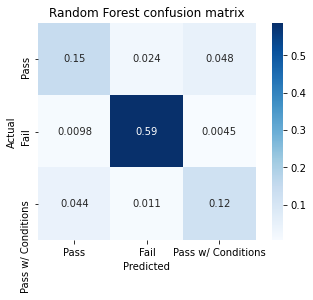

In [13]:
rf_confusion = confusion_matrix(y_test, y_pred_rf, normalize='all')
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Pass', 'Fail', 'Pass w/ Conditions'],
           yticklabels=['Pass', 'Fail', 'Pass w/ Conditions'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest confusion matrix');

plt.savefig('charts/confusion_matrix_rf_food', bbox_inches='tight')

In [14]:
df_features = df.columns.drop(['Results', 'Inspection Date'])

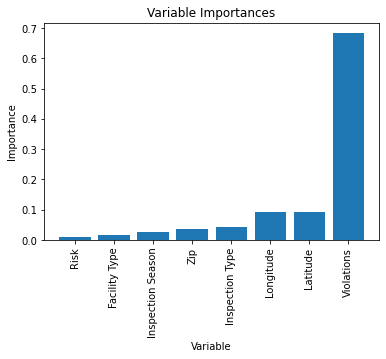

In [15]:
D = dict(zip(df_features, rf.feature_importances_ ))
D = {k: v for k, v in sorted(D.items(), key=lambda item: item[1])}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
;

plt.savefig('charts/variable_importance_rf', bbox_inches='tight')

### 1b. Random forest Classifier with class imbalance

In [16]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1,class_weight="balanced",random_state =50 , min_samples_leaf = 10)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [17]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[ 5063   834  2422]
 [  451 21971   298]
 [ 1015   337  5401]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68      8319
           1       0.95      0.97      0.96     22720
           2       0.67      0.80      0.73      6753

    accuracy                           0.86     37792
   macro avg       0.80      0.79      0.79     37792
weighted avg       0.86      0.86      0.86     37792



In [18]:
rfc.feature_importances_

array([0.02227663, 0.04527124, 0.04375811, 0.0141225 , 0.0112731 ,
       0.06370413, 0.78727402, 0.01232028])

In [19]:
# feature importance

feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Violations           Importance: 0.7873
Variable: Inspection Type      Importance: 0.0637
Variable: Latitude             Importance: 0.0453
Variable: Longitude            Importance: 0.0438
Variable: Zip                  Importance: 0.0223
Variable: Facility Type        Importance: 0.0141
Variable: Inspection Season    Importance: 0.0123
Variable: Risk                 Importance: 0.0113


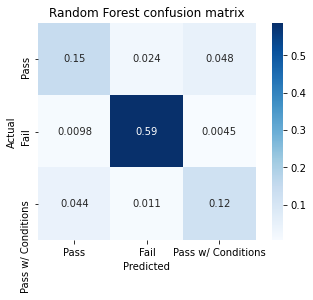

In [20]:
rfc_confusion = confusion_matrix(y_test, y_pred_rf, normalize='all')
sns.heatmap(rfc_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Pass', 'Fail', 'Pass w/ Conditions'],
           yticklabels=['Pass', 'Fail', 'Pass w/ Conditions'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest confusion matrix');

plt.savefig("confusion_matrix_rfc_food")

In [ ]:
# Save tree as dot file
export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
                feature_names = features, max_depth = 6,
                class_names = ['poor health', 'good health'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# Visualize
Image(filename='tree_real_data.png')

## 2. XGBoost

### 2a. Baseline / benchmark

In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [23]:
# LR benchamark
lr = LinearRegression()
lr.fit(X_train, y_train)
rmse(lr.predict(X_test), y_test)

0.6224470073346028

In [24]:
# RF benchmark
rf = RandomForestRegressor(n_estimators = 100, max_features = 3, n_jobs=-1)
rf.fit(X_train,y_train)
rmse(rf.predict(X_test), y_test)

0.5212887869221258

In [36]:
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:squarederror",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-rmse:0.74488	validation_1-rmse:0.74251
[1]	validation_0-rmse:0.71513	validation_1-rmse:0.71261
[2]	validation_0-rmse:0.69004	validation_1-rmse:0.68740
[3]	validation_0-rmse:0.66905	validation_1-rmse:0.66630
[4]	validation_0-rmse:0.65460	validation_1-rmse:0.65179
[5]	validation_0-rmse:0.63881	validation_1-rmse:0.63587
[6]	validation_0-rmse:0.62573	validation_1-rmse:0.62265
[7]	validation_0-rmse:0.61292	validation_1-rmse:0.60973
[8]	validation_0-rmse:0.60577	validation_1-rmse:0.60255
[9]	validation_0-rmse:0.59774	validation_1-rmse:0.59446
[10]	validation_0-rmse:0.58951	validation_1-rmse:0.58631
[11]	validation_0-rmse:0.58393	validation_1-rmse:0.58068
[12]	validation_0-rmse:0.57807	validation_1-rmse:0.57490
[13]	validation_0-rmse:0.57249	validation_1-rmse:0.56937
[14]	validation_0-rmse:0.56794	validation_1-rmse:0.56486
[15]	validation_0-rmse:0.56420	validation_1-rmse:0.56119
[16]	validation_0-rmse:0.56118	validation_1-rmse:0.55823
[17]	validation_0-rmse:0.55877	validation

Starting xgb benchmark: we've already improved on RF.

In [26]:
# predict using n_estimators with lowest validation error
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit),y_test) 

0.5127903732091729

To tune, we should use validation results and ignore test until final verification. So here's the validation error benchmark we want to beat:

In [27]:
rmse(gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit),y_val) 

0.5097691912179196

In [28]:
gbm = xgb.XGBRegressor(
    n_estimators=30000,  #arbitrary large number
    max_depth=7,
    objective="reg:squarederror",
    learning_rate=.05,
    subsample=.8,
    min_child_weight=12,
    colsample_bytree=.7,
    n_jobs=-1,
    random_state=0)

eval_set = [(X_train, y_train),
            (X_val, y_val)]  #tracking train/validation error as we go
fit_model = gbm.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='rmse',
    early_stopping_rounds=50,
    verbose=False)
rmse(gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit), y_val)

0.5027830039619762

In [29]:
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit),y_test) 

0.505429914064487

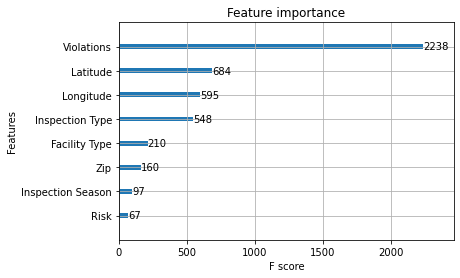

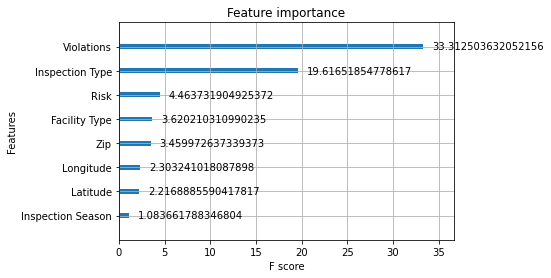

In [37]:
xgb.plot_importance(gbm)
plt.savefig('charts/feature_importance_frequency', bbox_inches='tight')

xgb.plot_importance(gbm, importance_type='gain')

plt.savefig('charts/feature_importance_gain', bbox_inches='tight')

In [40]:
df['Violations'].value_counts().head(20)

158771    29284
70019        10
99395        10
143826       10
46611         7
143828        7
82915         7
141683        6
46641         6
143304        5
127340        5
137746        5
151894        5
137917        5
148426        5
143796        5
143827        5
57142         5
82284         5
142996        5
Name: Violations, dtype: int64

In [31]:
gbm.get_booster().get_score(importance_type='weight') #extract raw frequency scores

{'Violations': 12834,
 'Latitude': 9650,
 'Facility Type': 2053,
 'Inspection Season': 2521,
 'Zip': 3303,
 'Inspection Type': 4199,
 'Risk': 1059,
 'Longitude': 8770}

In [32]:
gbm.get_booster().get_score(importance_type='gain') #extract raw gain scores

{'Violations': 10.237374980377046,
 'Latitude': 1.397760310688363,
 'Facility Type': 1.5957995305649517,
 'Inspection Season': 0.8848274144593432,
 'Zip': 1.4359672283030793,
 'Inspection Type': 6.302959162252771,
 'Risk': 1.4814646733360342,
 'Longitude': 1.4229471463850967}